In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Arabinda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   


In [4]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Arabinda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
#Load titnic data set
url=r'C:\Users\Arabinda\Downloads\titanic_ dataset_final.csv'
df=pd.read_csv(url)


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#print the missing values in the dataset
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Survived Count')

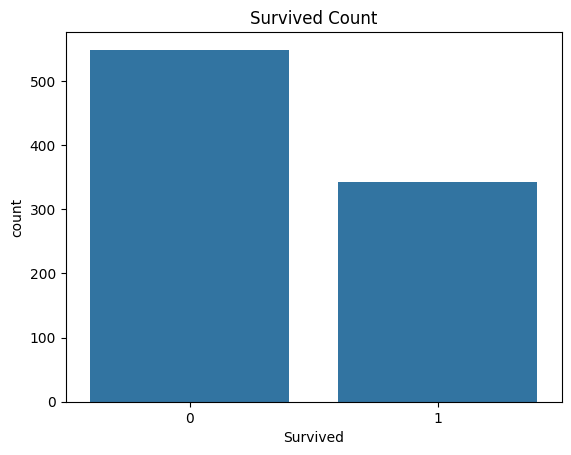

In [8]:
# Servival rate visualization
sns.countplot(x='Survived',data=df)
plt.title('Survived Count')

In [9]:
import ollama

def generate_insights(df_summary):
   prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
   response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
   return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n🔹 AI-Generated Insights:\n", insights)


🔹 AI-Generated Insights:
  The dataset appears to be the Titanic passenger data, as suggested by its structure and characteristics. Here are some insights based on the summary provided:

1. Total number of passengers: 891 (count)
2. Average Survival rate: 0.383838 (approximately 38.4%)
3. Average Passenger Class: 2.308642 (first class - 1, second class - 2, third class - 3)
4. Average Age: 29.699118 years old
5. Average number of Siblings/Spouses aboard: 0.523008 (rounded to 0.5 siblings or spouses per passenger on average)
6. Average number of parents/children with passengers: 0.381594 (rounded to 0.4 parents or children per passenger on average)
7. Average Fare: $32.204208
8. Standard deviation for all variables, indicating the spread around their mean values:
   - Survived: 0.486592 (indicating a significant variability in survival rates)
   - Pclass: 0.836071 (showing a slight difference in the passenger class distribution)
   - Age: 14.526497 years (indicating a wide range of age

In [13]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo=gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="EDA Analysis with AI Insights", description="Upload a CSV file to perform EDA and get AI-generated insights.")

# Launch App
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://42a80de2a7f7e076bd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio\flagged\dataset1.csv
